<a href="https://colab.research.google.com/github/NelaRepko/NelaRepko-GoIT_hw_Python/blob/main/goit_hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving facebook_ads_data (2.0).csv to facebook_ads_data (2.0).csv


In [3]:
uploaded.keys()

dict_keys(['facebook_ads_data (2.0).csv'])

In [4]:
df_fb = pd.read_csv('facebook_ads_data (2.0).csv')
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1494 non-null   object 
 1   campaign_name      1494 non-null   object 
 2   total_spend        1494 non-null   float64
 3   total_impressions  1494 non-null   int64  
 4   total_clicks       1494 non-null   int64  
 5   total_value        1494 non-null   float64
 6   cpc                1443 non-null   float64
 7   cpm                1462 non-null   float64
 8   ctr                1462 non-null   float64
 9   romi               1462 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 116.8+ KB


In [5]:
from google.colab import files
uploaded = files.upload()

Saving facebook_ads_data (2.0).csv to facebook_ads_data (2.0) (1).csv


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("/content/facebook_ads_data (2.0).csv")

In [10]:
# ad_date у datetime
df["ad_date"] = pd.to_datetime(df["ad_date"])


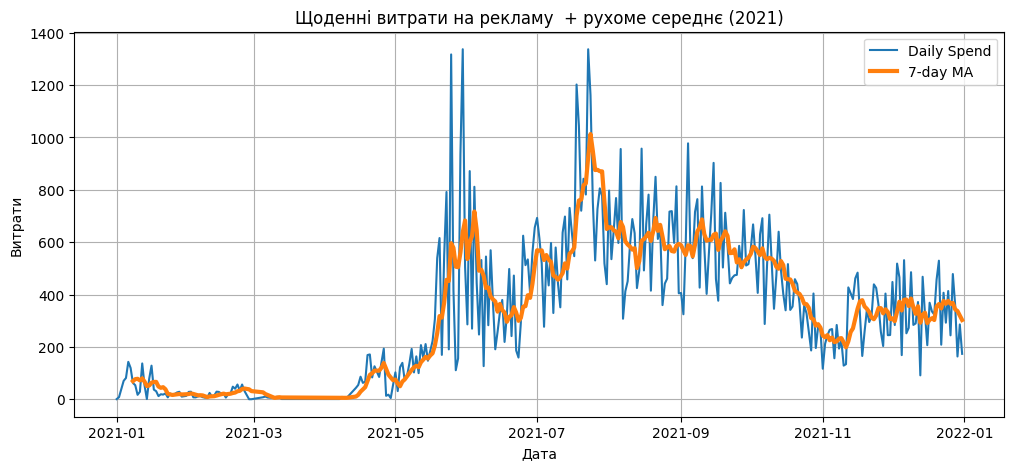

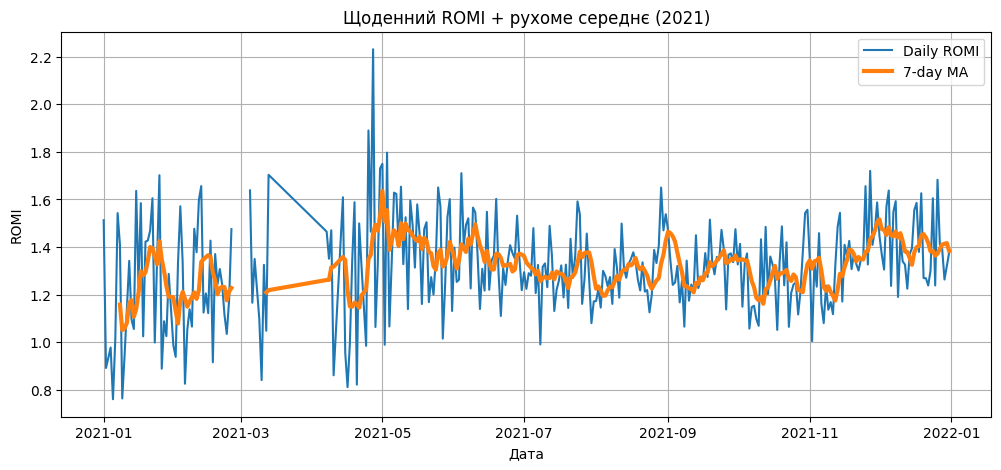

In [11]:
# Групування по днях
daily = df.groupby("ad_date").agg({
    "total_spend": "sum",
    "romi": "mean"
}).reset_index()

# Фільтр 2021 рік
daily_2021 = daily[daily["ad_date"].dt.year == 2021].copy()

# Рухоме середнє (7 днів)
daily_2021["spend_ma"] = daily_2021["total_spend"].rolling(window=7).mean()
daily_2021["romi_ma"] = daily_2021["romi"].rolling(window=7).mean()

plt.figure(figsize=(12,5))
plt.plot(daily_2021["ad_date"], daily_2021["total_spend"], label="Daily Spend")
plt.plot(daily_2021["ad_date"], daily_2021["spend_ma"], label="7-day MA", linewidth=3)
plt.title("Щоденні витрати на рекламу  + рухоме середнє (2021)")
plt.xlabel("Дата")
plt.ylabel("Витрати")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(daily_2021["ad_date"], daily_2021["romi"], label="Daily ROMI")
plt.plot(daily_2021["ad_date"], daily_2021["romi_ma"], label="7-day MA", linewidth=3)
plt.title("Щоденний ROMI + рухоме середнє (2021)")
plt.xlabel("Дата")
plt.ylabel("ROMI")
plt.legend()
plt.grid(True)
plt.show()

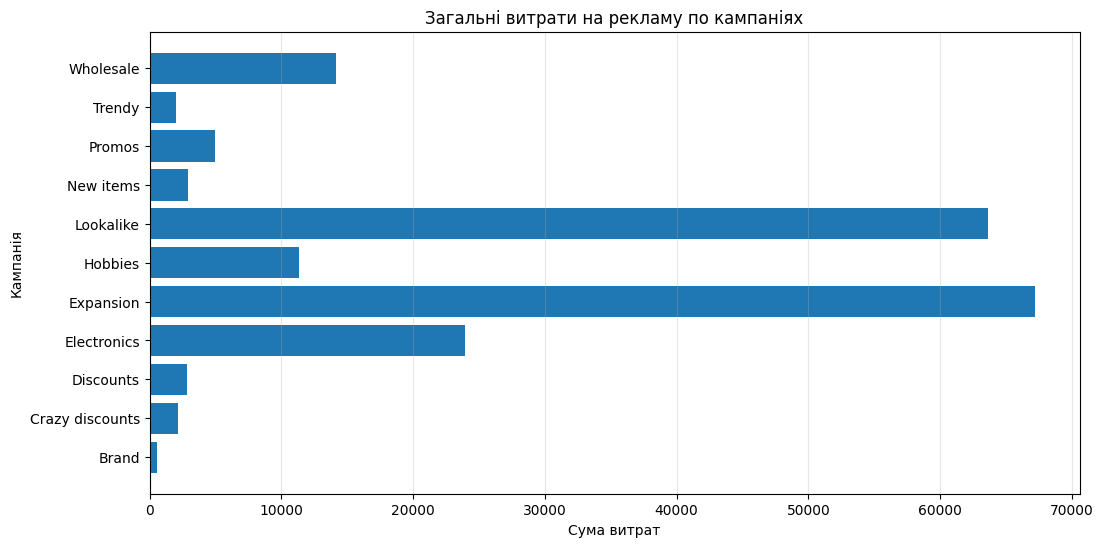

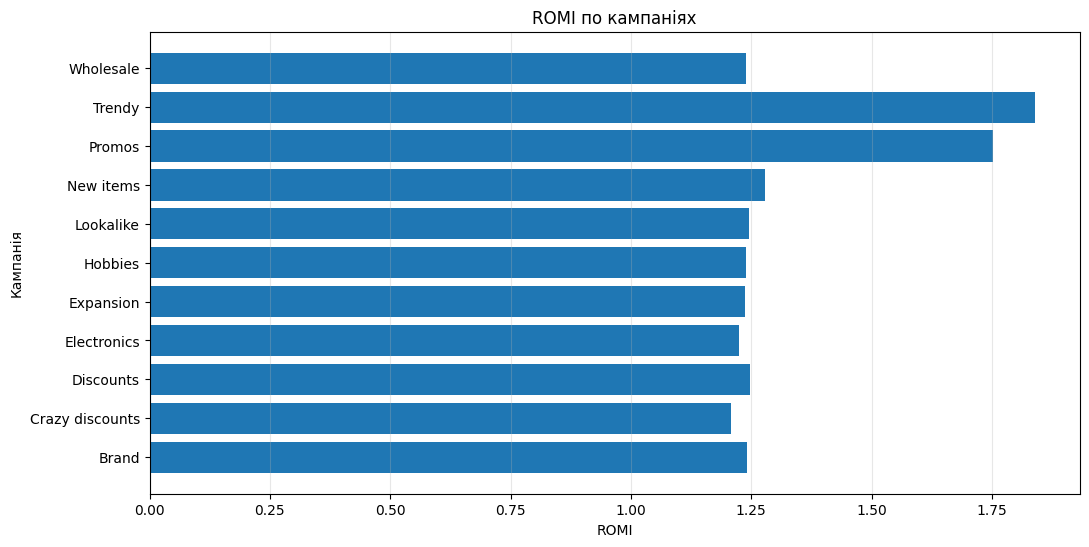

In [12]:
# Групування за кампанією
campaign_stats = df.groupby("campaign_name").agg({
    "total_spend": "sum",
    "romi": "mean"   # середній romi або можеш замінити на sum, якщо потрібно
}).reset_index()

plt.figure(figsize=(12,6))
plt.barh(campaign_stats["campaign_name"], campaign_stats["total_spend"])
plt.title("Загальні витрати на рекламу по кампаніях")
plt.xlabel("Сума витрат")
plt.ylabel("Кампанія")
plt.grid(axis="x", alpha=0.3)
plt.show()

plt.figure(figsize=(12,6))
plt.barh(campaign_stats["campaign_name"], campaign_stats["romi"])
plt.title("ROMI по кампаніях")
plt.xlabel("ROMI")
plt.ylabel("Кампанія")
plt.grid(axis="x", alpha=0.3)
plt.show()

<Figure size 1400x600 with 0 Axes>

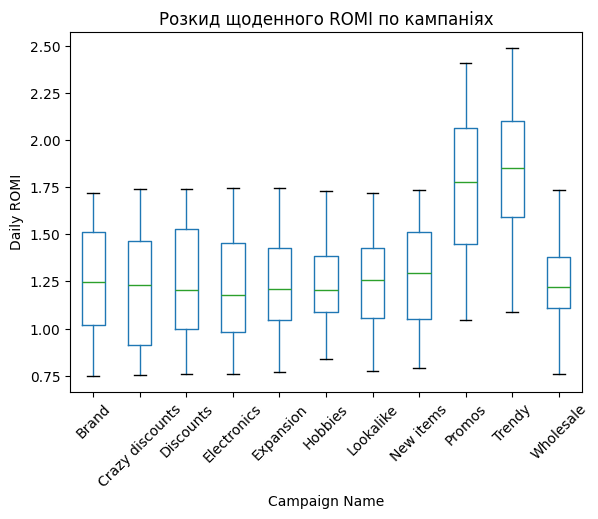

In [13]:
# Групування за датою та кампанією — ROMI на день
daily_romi = (
    df.groupby(["campaign_name", "ad_date"])["romi"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(14, 6))
daily_romi.boxplot(column="romi", by="campaign_name", grid=False, rot=45)
plt.title("Розкид щоденного ROMI по кампаніях")
plt.suptitle("")  # прибирає дублюючий заголовок
plt.xlabel("Campaign Name")
plt.ylabel("Daily ROMI")
plt.show()

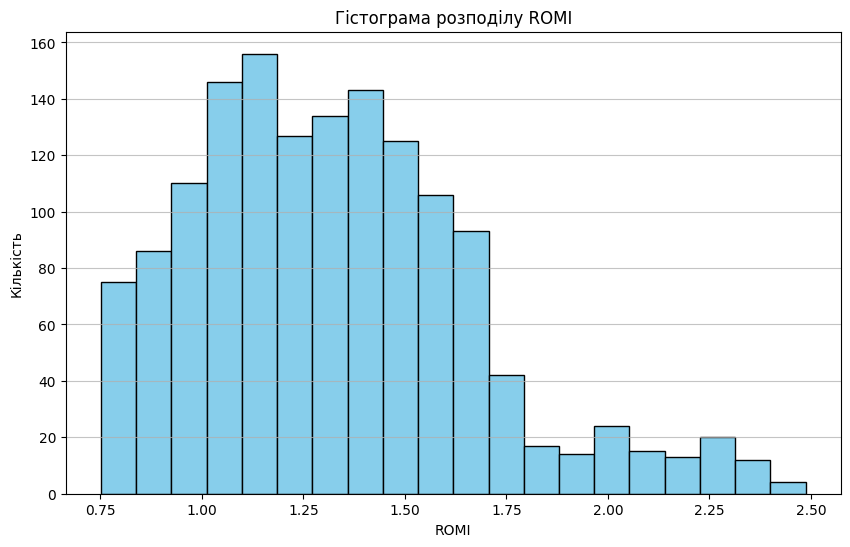

In [14]:
# Побудова гістограми розподілу ROMI
plt.figure(figsize=(10,6))
plt.hist(df['romi'], bins=20, color='skyblue', edgecolor='black')
plt.title('Гістограма розподілу ROMI')
plt.xlabel('ROMI')
plt.ylabel('Кількість')
plt.grid(axis='y', alpha=0.75)
plt.show()

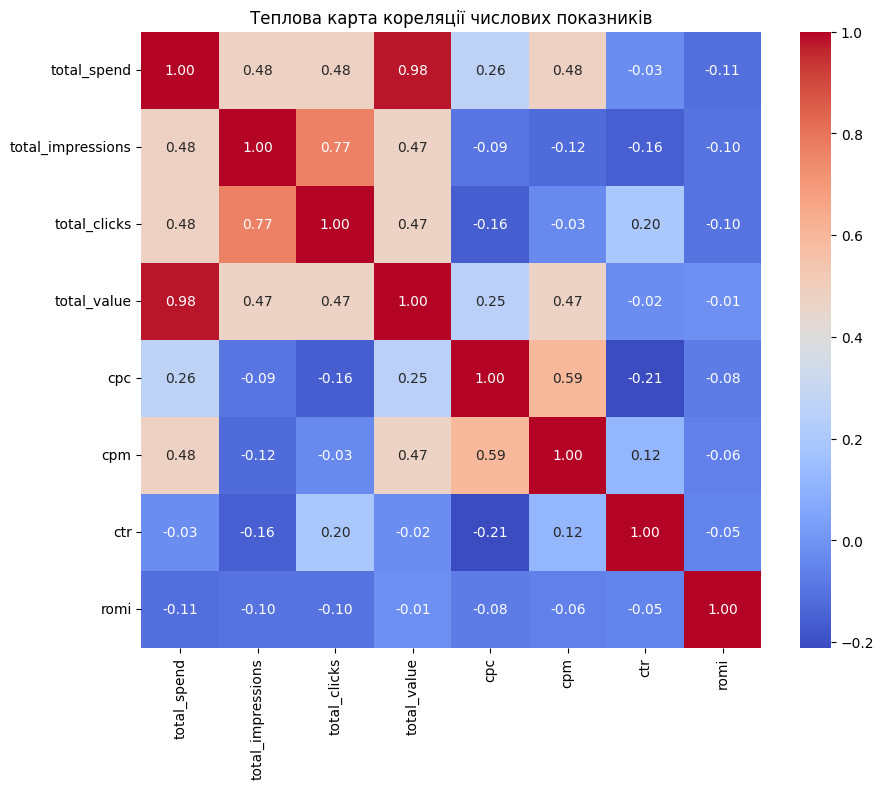

Найвища кореляція: ('total_spend', 'total_value') = 0.98
Найнижча кореляція: ('cpc', 'ctr') = -0.21

Кореляція 'total_value' з іншими показниками:
total_value          1.000000
total_spend          0.978890
total_clicks         0.472124
total_impressions    0.472037
cpm                  0.471338
cpc                  0.250851
romi                -0.013733
ctr                 -0.022267
Name: total_value, dtype: float64


In [18]:
import seaborn as sns
df = pd.read_csv('facebook_ads_data (2.0).csv')

# Вибираємо числові колонки
numeric_df = df.select_dtypes(include='number')

# Розрахунок матриці кореляцій
corr_matrix = numeric_df.corr()

# Побудова теплової карти
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Теплова карта кореляції числових показників')
plt.show()

# Найвища і найнижча кореляція (крім 1)
corr_unstacked = corr_matrix.where(~(corr_matrix==1)).stack()
max_corr = corr_unstacked.idxmax(), corr_unstacked.max()
min_corr = corr_unstacked.idxmin(), corr_unstacked.min()
print(f"Найвища кореляція: {max_corr[0]} = {max_corr[1]:.2f}")
print(f"Найнижча кореляція: {min_corr[0]} = {min_corr[1]:.2f}")

# Кореляція 'total_value' з іншими показниками
total_value_corr = corr_matrix['total_value'].sort_values(ascending=False)
print("\nКореляція 'total_value' з іншими показниками:")
print(total_value_corr)

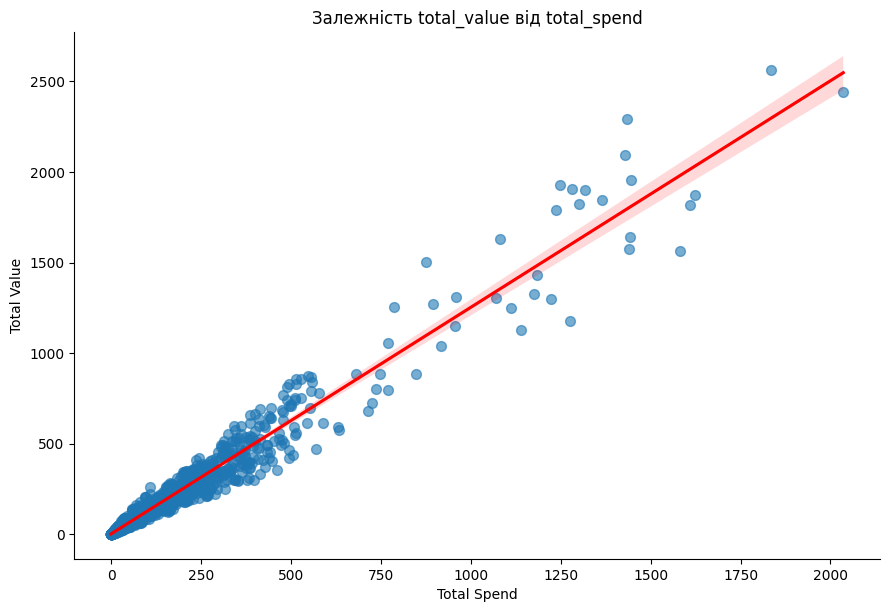

In [19]:
# точкова діаграма з регресійною лінією
sns.lmplot(
    data=df,                # дані
    x='total_spend',        # вісь X
    y='total_value',        # вісь Y
    height=6,               # висота графіку
    aspect=1.5,             # співвідношення ширини до висоти
    line_kws={'color': 'red'},  # колір лінії регресії
    scatter_kws={'s': 50, 'alpha':0.6}  # параметри точок
)

plt.title('Залежність total_value від total_spend')
plt.xlabel('Total Spend')
plt.ylabel('Total Value')
plt.show()